<a href="https://colab.research.google.com/github/raihanhd12/PCVK_Genap_2023/blob/main/Minggu%203/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

# Praktikum
## Transformasi Linier Brightness

> Formula: g(x,y) = f(x,y) + b

> g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, b adalah nilai brightness






 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


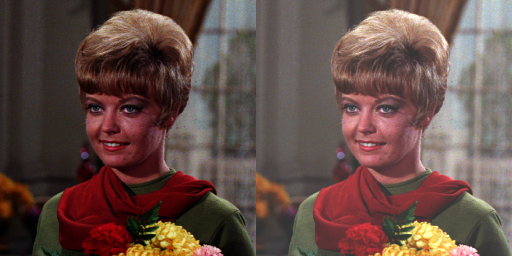

In [43]:
print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# Akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# Cara simpel tanpa for loop
# brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# Tugas Praktikum

### 1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori

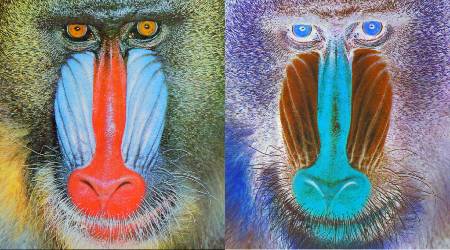

In [44]:
original = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/mandrill.tiff')

inverse_image = 255 - original

final_frame = cv.hconcat((original, inverse_image))
img_resize = cv.resize(final_frame,(450,250))
cv2_imshow(img_resize)

### 2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk kontras

Mengubah kontras dan tingkat kecerahan citra 
---------------------------------------------
Masukkan tingkat kecerahan [-255, 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


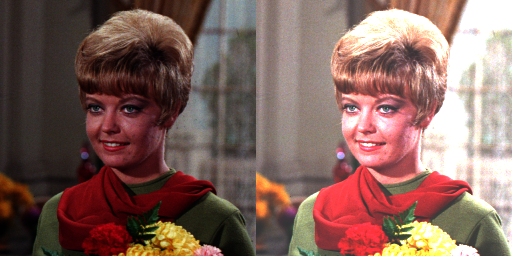

In [45]:
print('Mengubah kontras dan tingkat kecerahan citra ')
print('---------------------------------------------')
try:
  brightness = int(input('Masukkan tingkat kecerahan [-255, 255]: '))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/female.tiff')
gabung_image = np.zeros(original.shape, original.dtype)

# Akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gabung_image[y,x,c] = np.clip(original[y,x,c] * contrast  + brightness, 0, 255)

final_frame = cv.hconcat((original, gabung_image))
cv2_imshow(final_frame)

### 3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi log

Mengubah tingkat kecerahan citra dengan Transformasi Log 
----------------------------------
Masukkan nilai kecerahan: 50


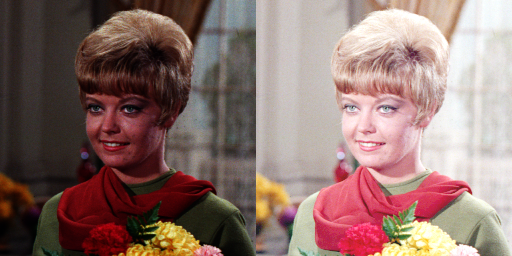

In [46]:
print('Mengubah tingkat kecerahan citra dengan Transformasi Log ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# Akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness * np.log(1 + original[y,x,c]), 0, 255)

# RUMUS
# c = constanta
# y = c * np.log(1 + r)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

### 4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori

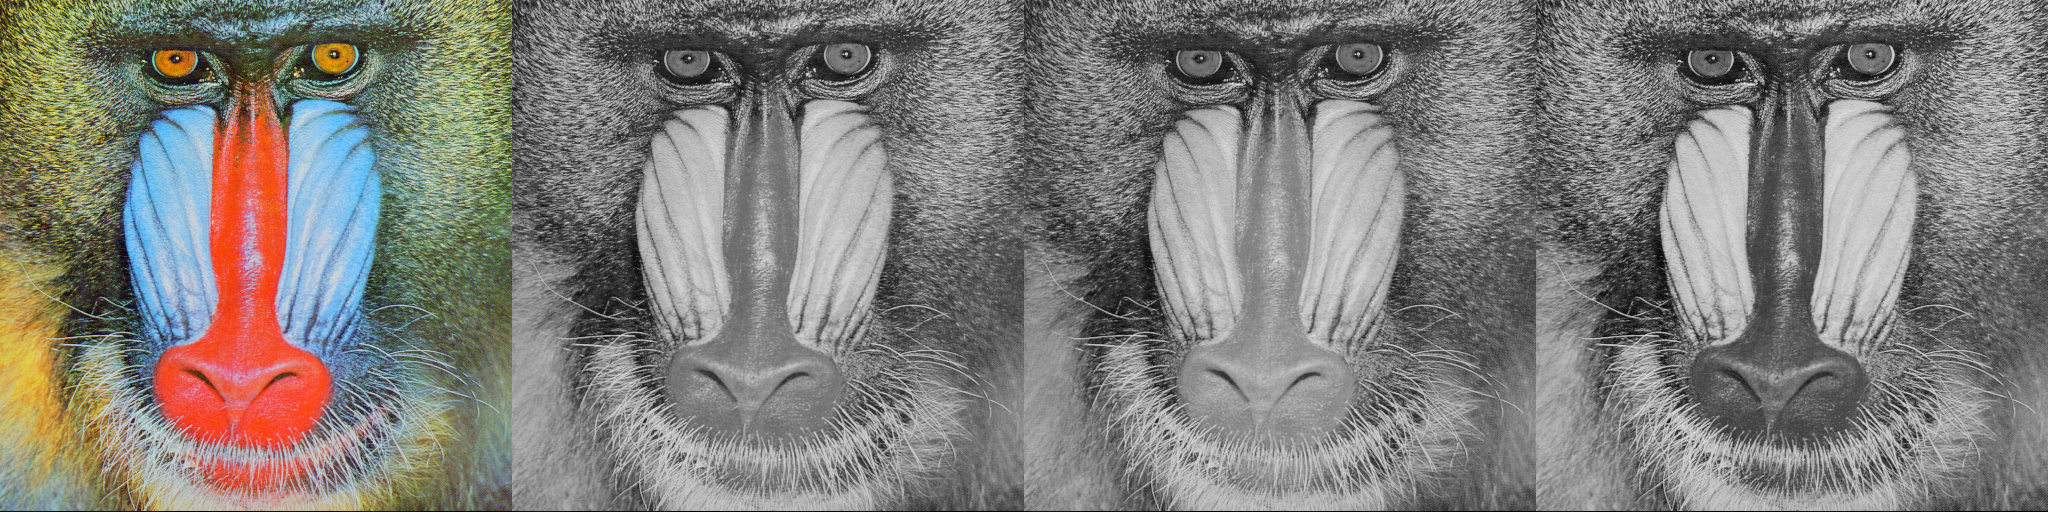

In [47]:
original = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/mandrill.tiff')
img_avg = np.zeros(original.shape, original.dtype)
img_light = np.zeros(original.shape, original.dtype)
img_lumi = np.zeros(original.shape, original.dtype)

# Akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    r, g, b = original[y,x]

    # Averaging 
    gray_avg = (int(r) + int(g)+ int(b)) / 3
    img_avg[y,x] = gray_avg

    # Lightness
    warna = int(r), int(g), int(b)
    gray_light = (max(warna) + min(warna)) / 2
    img_light[y,x] = gray_light    

    # Luminance
    gray_lumi = ( (int(r)*0.21) + (int(g)*0.72) + (int(b)*0.07))
    img_lumi[y,x] = gray_lumi

final_frame = cv.hconcat((original, img_avg, img_light, img_lumi))
cv2_imshow(final_frame)

### 5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna biru menjadi grayscale

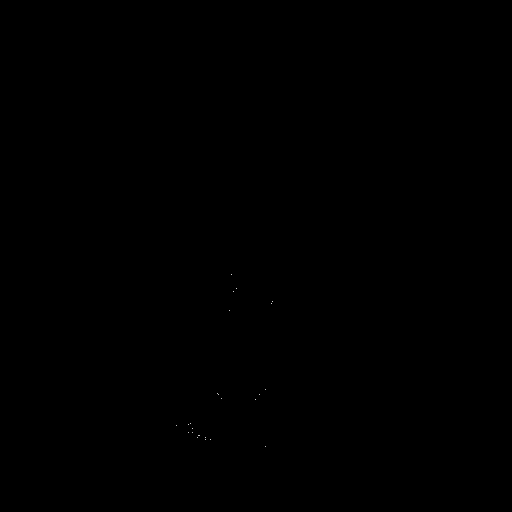

In [62]:
import cv2 as cv
import numpy as np

# Load the image
original = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/mandrill.tiff')

# Create grayscale image
gray = np.zeros(original.shape[:2], dtype=np.uint8)

# Access each pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    r, g, b = original[y, x]

    # Check if pixel is blue
    if b > max(r, g):
      # If blue, keep color
      gray[y, x] = b
    else:
      # If not blue, convert to grayscale
      gray[y, x] = int((0.3*r) + (0.59*g) + (0.11*b))

# Merge the images horizontally for display
final_frame = np.hstack((original, cv.cvtColor(gray, cv.COLOR_GRAY2BGR)))

# Display the result
cv2_imshow(final_frame)